In [63]:
# Install necessary packages
%pip install nltk pandas matplotlib seaborn numpy scikit-learn joblib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [65]:
merged_data = pd.read_csv('/workspaces/IST707.Pothole-Prediction-SYR/data/processed/merged_data.csv')

In [66]:
# handling null when there were no potholes
null_counts = merged_data.isnull().sum()
print(null_counts)

Unnamed: 0                   0
Temp at Recording            0
Dew Point / Frost Point      0
Wet Bulb Temp                0
Surface Temperature          0
Temperature Range            0
Temp Max                     0
Temp Min                     0
Specific Humidity            0
Relative Humidity            0
Precipitation                0
Date                         0
Matched_Street             725
Pavement_rating            725
Miles                      725
Shape__Length              725
SentimentScore             725
SeverityLevel              725
Potholes_Count             725
Rating                     725
Minutes_to_closed          725
dtype: int64


In [67]:
# Fill the numeric columns with 0, which indicates no potholes
merged_data['Pavement_rating'].fillna(0, inplace=True)
merged_data['Miles'].fillna(0, inplace=True)
merged_data['Shape__Length'].fillna(0, inplace=True)
merged_data['SentimentScore'].fillna(0, inplace=True)
merged_data['Potholes_Count'].fillna(0, inplace=True)
merged_data['Rating'].fillna(0, inplace=True)
merged_data['Minutes_to_closed'].fillna(0, inplace=True)

# Fill the categorical column 'SeverityLevel' with 'None' or a similar value that indicates no potholes
merged_data['SeverityLevel'].fillna('None', inplace=True)
merged_data['Matched_Street'].fillna('None', inplace=True)

/tmp/ipykernel_12342/2630988032.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Pavement_rating'].fillna(0, inplace=True)
/tmp/ipykernel_12342/2630988032.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [68]:
merged_data.isnull().sum()

Unnamed: 0                 0
Temp at Recording          0
Dew Point / Frost Point    0
Wet Bulb Temp              0
Surface Temperature        0
Temperature Range          0
Temp Max                   0
Temp Min                   0
Specific Humidity          0
Relative Humidity          0
Precipitation              0
Date                       0
Matched_Street             0
Pavement_rating            0
Miles                      0
Shape__Length              0
SentimentScore             0
SeverityLevel              0
Potholes_Count             0
Rating                     0
Minutes_to_closed          0
dtype: int64

In [69]:
merged_data.to_csv('/workspaces/IST707.Pothole-Prediction-SYR/data/processed/final_data.csv')

In [70]:
# check duplicates 
merged_data.duplicated().sum()

np.int64(0)

In [71]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1317 non-null   int64  
 1   Temp at Recording        1317 non-null   float64
 2   Dew Point / Frost Point  1317 non-null   float64
 3   Wet Bulb Temp            1317 non-null   float64
 4   Surface Temperature      1317 non-null   float64
 5   Temperature Range        1317 non-null   float64
 6   Temp Max                 1317 non-null   float64
 7   Temp Min                 1317 non-null   float64
 8   Specific Humidity        1317 non-null   float64
 9   Relative Humidity        1317 non-null   float64
 10  Precipitation            1317 non-null   float64
 11  Date                     1317 non-null   object 
 12  Matched_Street           1317 non-null   object 
 13  Pavement_rating          1317 non-null   float64
 14  Miles                   

In [72]:
# numerical fearures
num_feats = ['Temp at Recording', 'Dew Point / Frost Point', 'Wet Bulb Temp', 'Surface Temperature', 'Temperature Range', 'Temp Max', 'Temp Min', 'Specific Humidity', 'Relative Humidity', 'Precipitation', 'Pavement_rating', 'Miles', 'Shape__Length','SentimentScore', 'Potholes_Count', 'Rating', 'Minutes_to_closed']
# categorical 
cat_feats = ['SeverityLevel', 'Matched_Street']

In [73]:
merged_data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
Temp at Recording,1317.0,8.761519,10.216252,-19.6800,-0.23,9.00,18.160000,28.550000
Dew Point / Frost Point,1317.0,5.263212,9.154205,-21.0000,-2.20,4.98,13.470000,22.580000
Wet Bulb Temp,1317.0,7.012217,9.629116,-20.3500,-1.08,6.72,15.850000,24.540000
Surface Temperature,1317.0,8.762521,10.322337,-20.8100,-0.38,8.50,18.350000,28.560000
Temperature Range,1317.0,9.321040,3.793495,1.1500,6.27,8.95,11.990000,22.200000
Temp Max,1317.0,13.441959,11.128985,-16.2200,3.05,14.61,23.370000,35.320000
Temp Min,1317.0,4.120790,9.809535,-24.0200,-2.60,3.55,12.870000,23.660000
Specific Humidity,1317.0,6.690904,4.018338,0.6100,3.30,5.55,9.830000,17.460000
Relative Humidity,1317.0,81.612308,10.450301,46.0000,75.38,82.69,89.880000,99.310000
Precipitation,1317.0,3.224358,6.072649,0.0000,0.07,0.85,3.450000,65.790000


/tmp/ipykernel_12342/3608302095.py:7: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=merged_data['Potholes_Count'], palette=mypal[1::4], hue = merged_data['Potholes_Count'], legend=False)


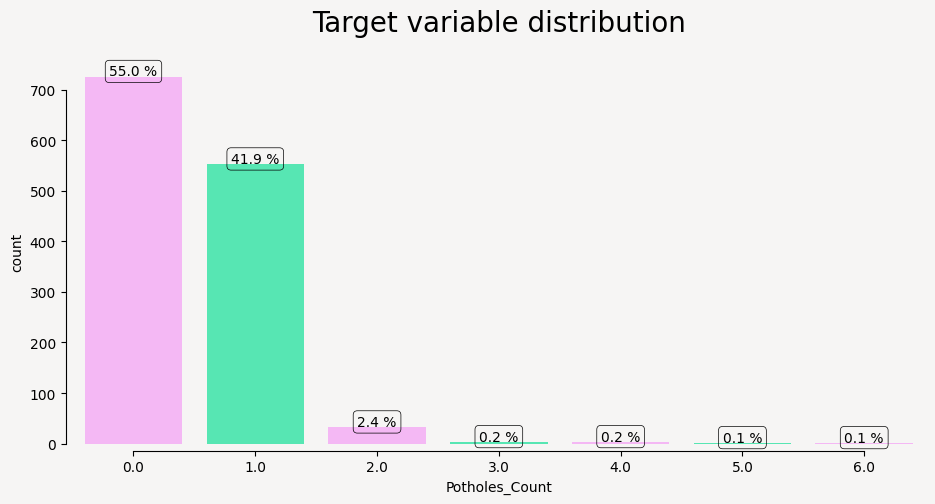

In [74]:
# explore target distribution

mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(11, 5),facecolor='#F6F5F4')
total = float(len(merged_data))
ax = sns.countplot(x=merged_data['Potholes_Count'], palette=mypal[1::4], hue = merged_data['Potholes_Count'], legend=False)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

/tmp/ipykernel_12342/2623017190.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=long_df, x='Category', kind='count', palette=mypal[1::4], height=6, aspect=2)
/tmp/ipykernel_12342/2623017190.py:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(data=long_df, x='Category', kind='count', palette=mypal[1::4], height=6, aspect=2)


<Figure size 1100x500 with 0 Axes>

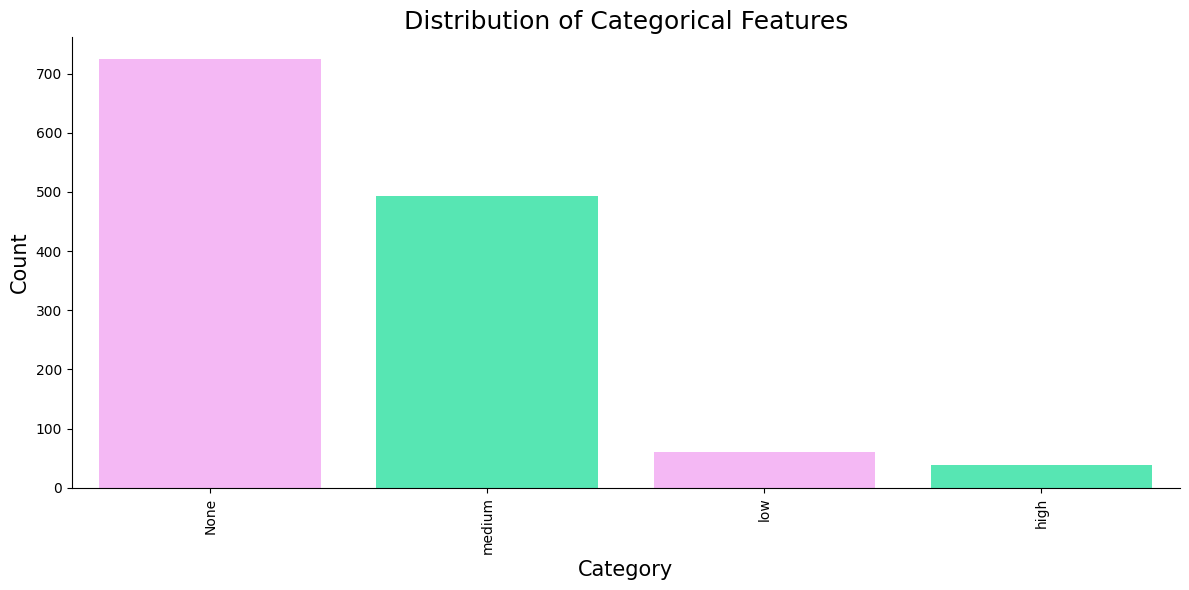

In [75]:
long_df = merged_data.melt(value_vars=cat_feats[0], var_name='Feature', value_name='Category')

plt.figure(figsize=(11, 5), facecolor='#F6F5F4')
sns.catplot(data=long_df, x='Category', kind='count', palette=mypal[1::4], height=6, aspect=2)
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title('Distribution of Categorical Features', fontsize=18)
plt.tight_layout()

/tmp/ipykernel_12342/4001395063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=long_df, x='Category', kind='count', palette=mypal[1::4], height=6, aspect=2)
/tmp/ipykernel_12342/4001395063.py:4: UserWarning: 
The palette list has fewer values (2) than needed (35) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(data=long_df, x='Category', kind='count', palette=mypal[1::4], height=6, aspect=2)


<Figure size 1100x500 with 0 Axes>

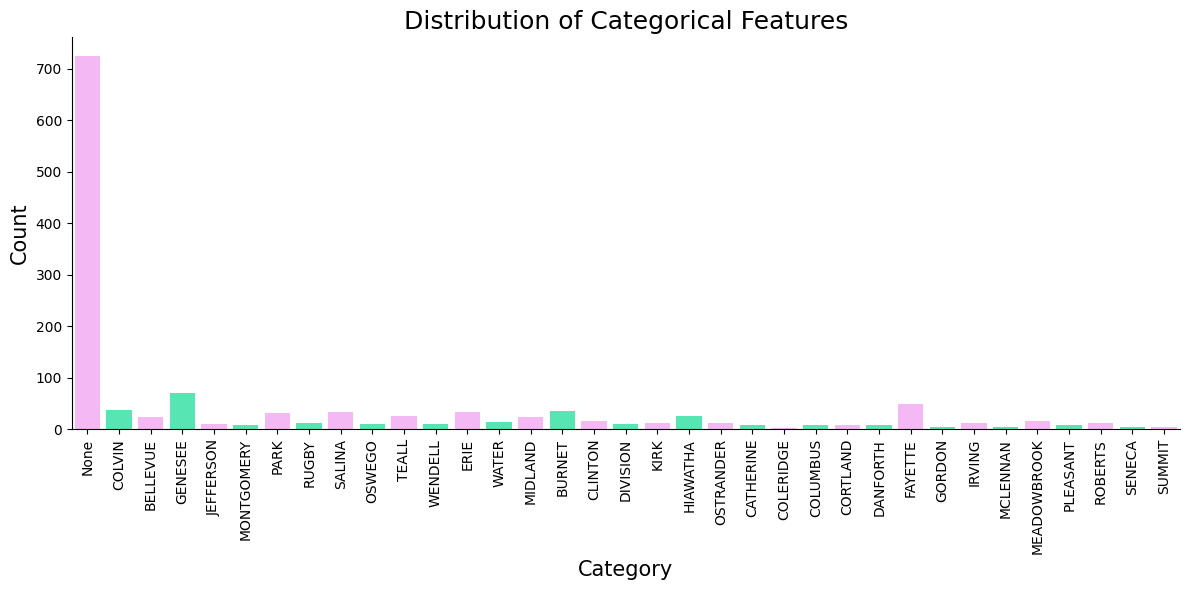

In [76]:
long_df = merged_data.melt(value_vars=cat_feats[1], var_name='Feature', value_name='Category')

plt.figure(figsize=(11, 5), facecolor='#F6F5F4')
sns.catplot(data=long_df, x='Category', kind='count', palette=mypal[1::4], height=6, aspect=2)
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title('Distribution of Categorical Features', fontsize=18)
plt.tight_layout()

In [77]:
# create a function to analyze numerical features individually

def num_plot(df, col, title, symb):
    # Create subplots for boxplot and histogram
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 5), gridspec_kw={"height_ratios": (.2, .8)})

    # Set title for the top subplot
    ax[0].set_title(title, fontsize=18)

    # Create a boxplot on the top subplot
    # sns.boxplot(x=col, data=df, ax=ax[0], color="#1D8EF5")
    sns.boxplot(x=col, data=df, ax=ax[0], color="#FEAEFE")

    # Remove y-axis ticks from the top subplot
    ax[0].set(yticks=[])

    # Create a histogram on the bottom subplot
    # sns.histplot(x=col, data=df, ax=ax[1], color="#33AAFF", edgecolor="#1D1EA2")
    sns.histplot(x=col, data=df, ax=ax[1], color="#3FFEBA")

    # Set the x-axis label for the histogram subplot
    ax[1].set_xlabel(col, fontsize=16)

    # Add vertical lines for mean, median, and mode values
    plt.axvline(df[col].mean(), color='darkgreen', linestyle='--', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(), 1)) + symb)
    plt.axvline(df[col].median(), color='red', linestyle='--', linewidth=2.2, label='median=' + str(np.round(df[col].median(), 1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linestyle='--', linewidth=2.2, label='mode=' + str(np.round(df[col].mode()[0], 1)) + symb)

    # Add legend to the plot
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=12, fancybox=True, shadow=True, frameon=True)

    # Adjust layout for better visualization
    plt.tight_layout()

    # Display the plot
    plt.show()

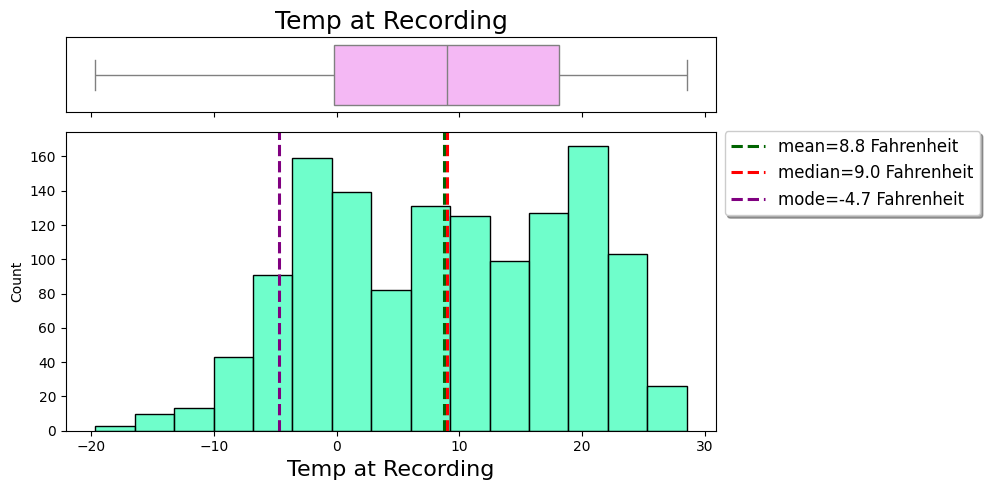

In [78]:
num_plot(merged_data, 'Temp at Recording', 'Temp at Recording', ' Fahrenheit')

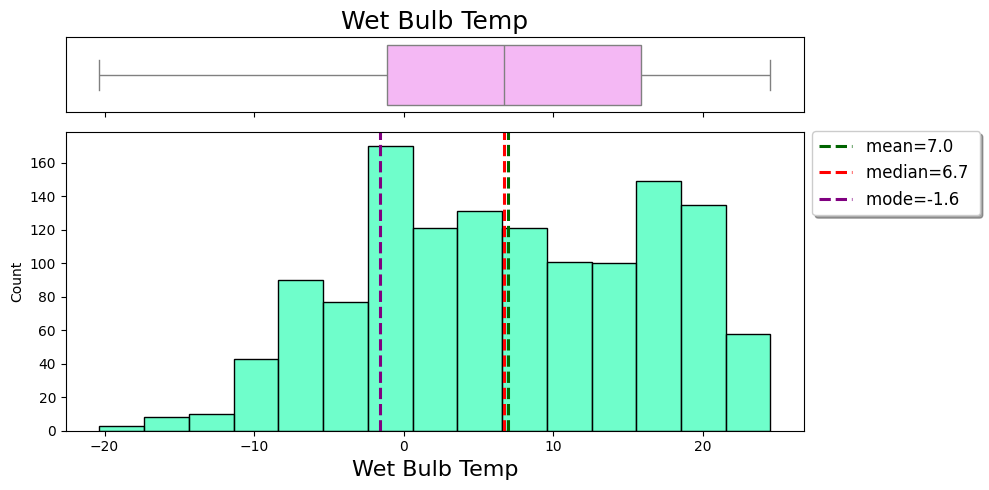

In [79]:
num_plot(merged_data, 'Wet Bulb Temp', 'Wet Bulb Temp', ' ')

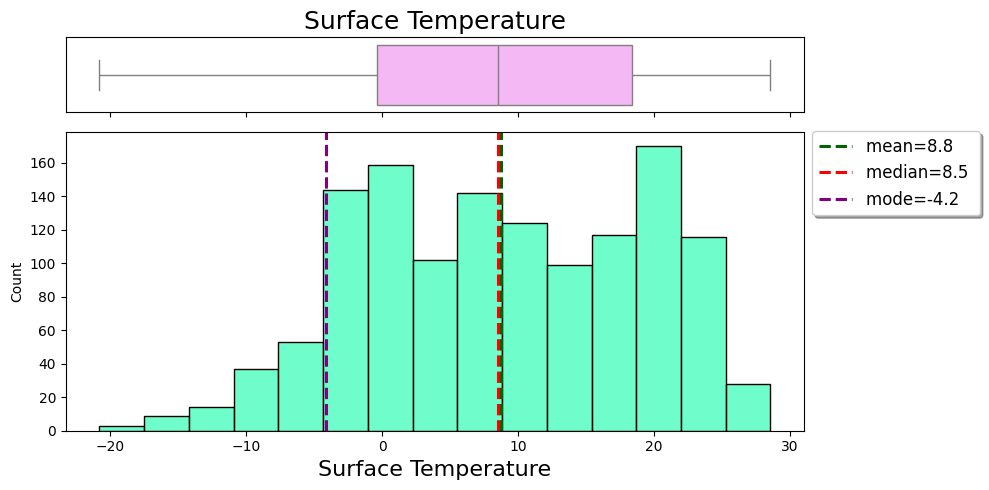

In [80]:
num_plot(merged_data, 'Surface Temperature', 'Surface Temperature', ' ')

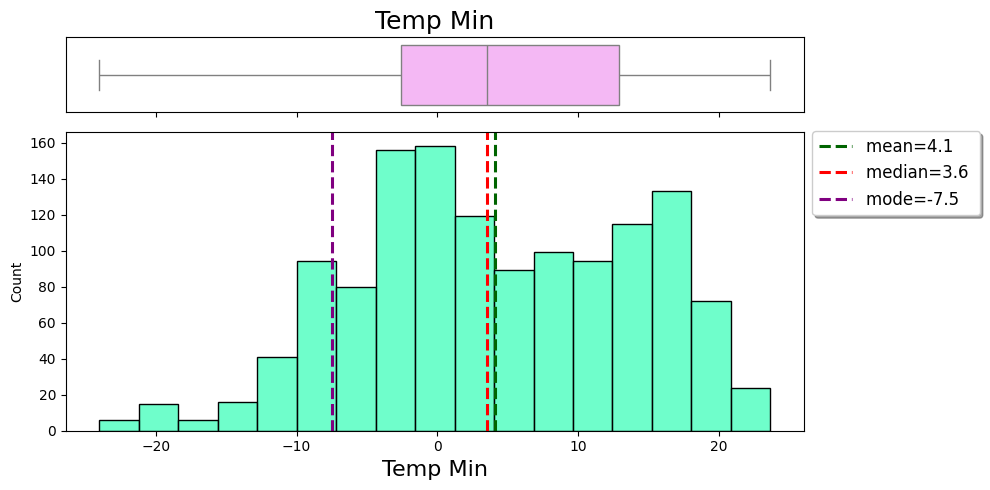

In [81]:
num_plot(merged_data, 'Temp Min', 'Temp Min', ' ')

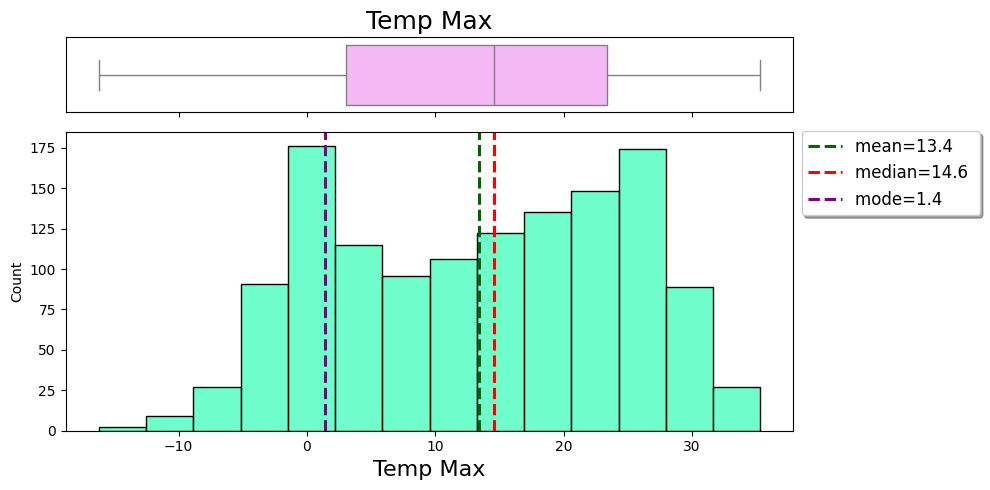

In [82]:
num_plot(merged_data, 'Temp Max', 'Temp Max', ' ')

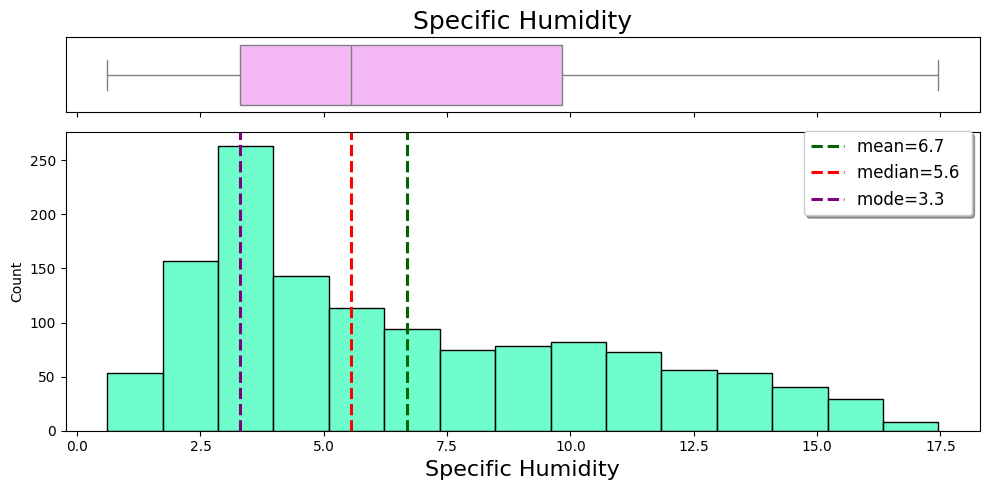

In [83]:
num_plot(merged_data, 'Specific Humidity', 'Specific Humidity', ' ')

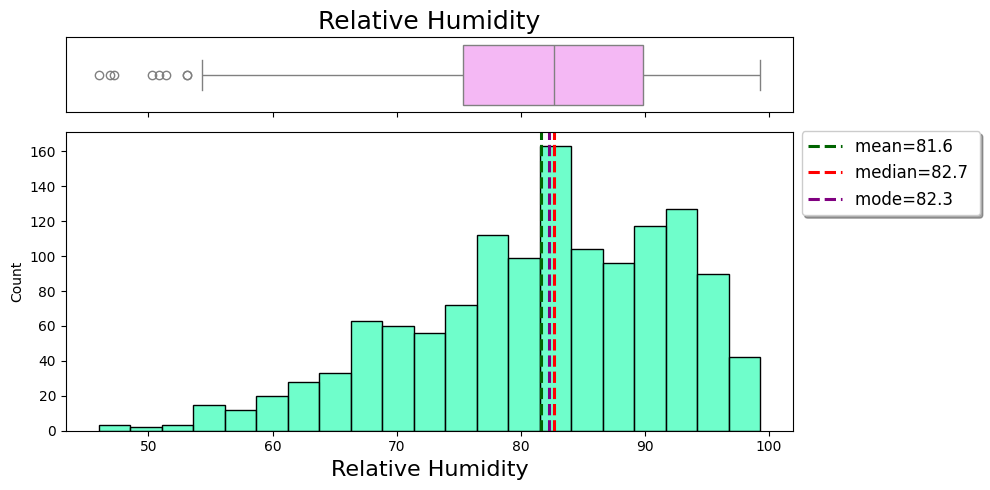

In [84]:
num_plot(merged_data, 'Relative Humidity', 'Relative Humidity', ' ')

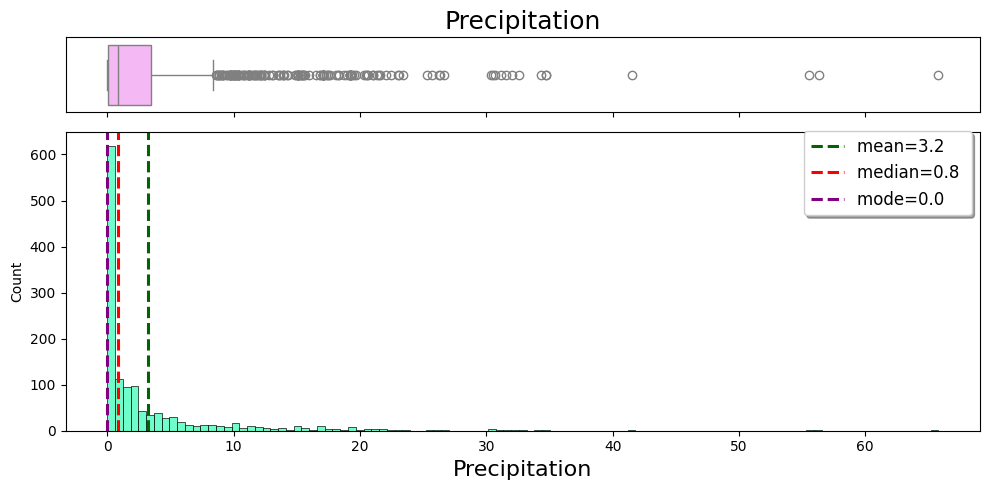

In [85]:
num_plot(merged_data, 'Precipitation', 'Precipitation', ' ')

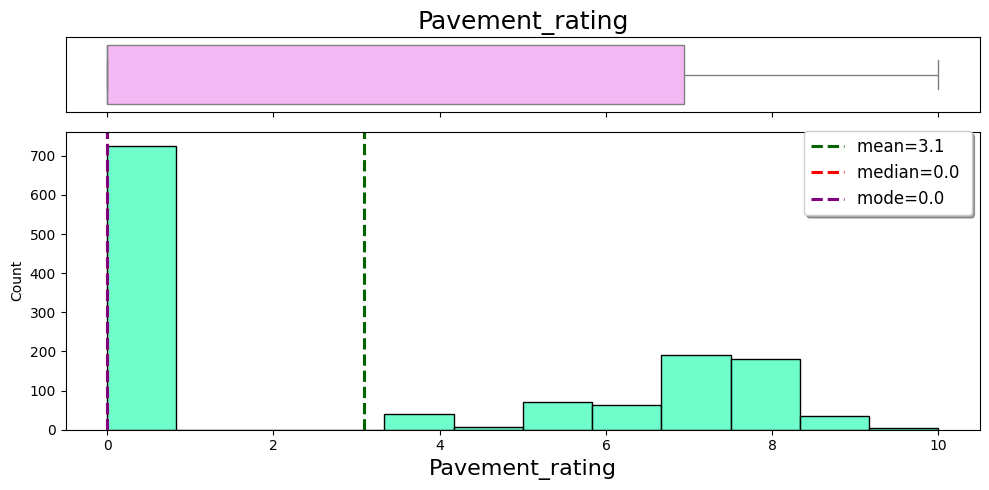

In [86]:
num_plot(merged_data, 'Pavement_rating', 'Pavement_rating', ' ')

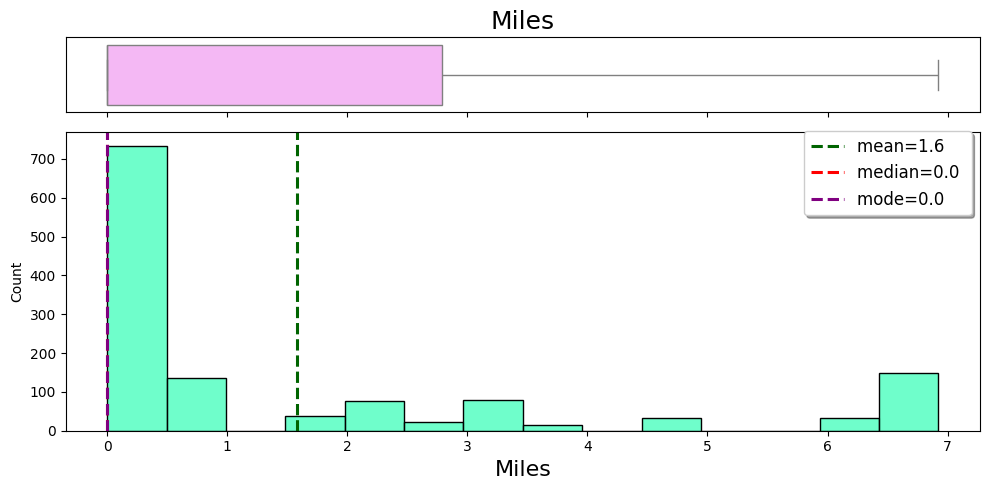

In [87]:
num_plot(merged_data, 'Miles', 'Miles', ' ')

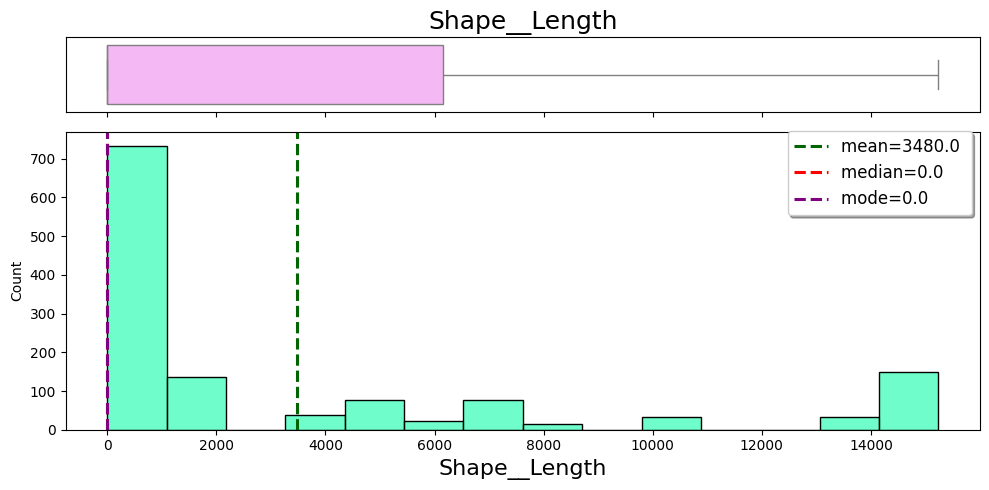

In [88]:
num_plot(merged_data, 'Shape__Length', 'Shape__Length', ' ')

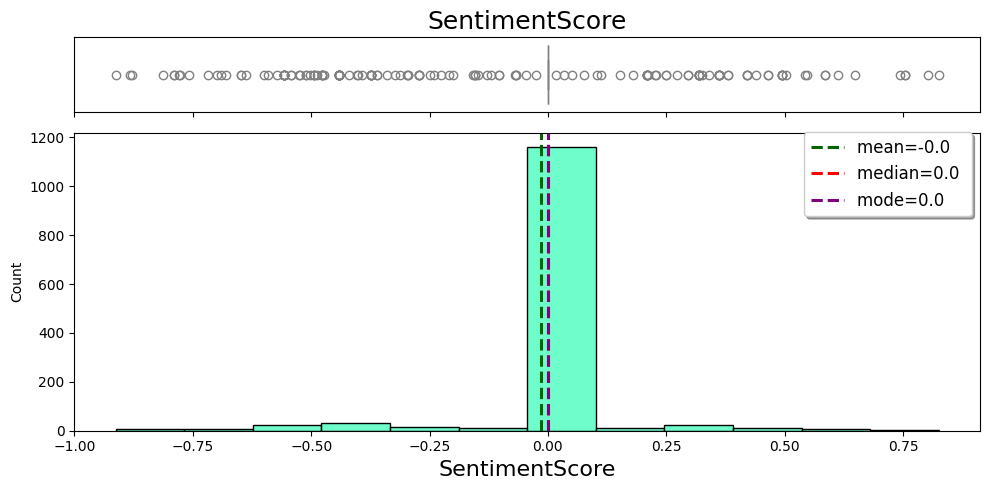

In [89]:
num_plot(merged_data, 'SentimentScore', 'SentimentScore', ' ')

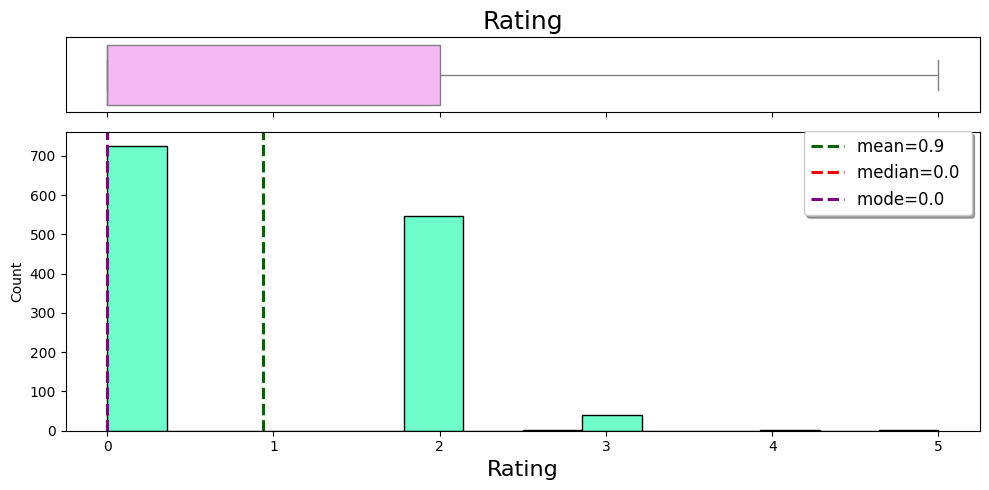

In [90]:
num_plot(merged_data, 'Rating', 'Rating', ' ')

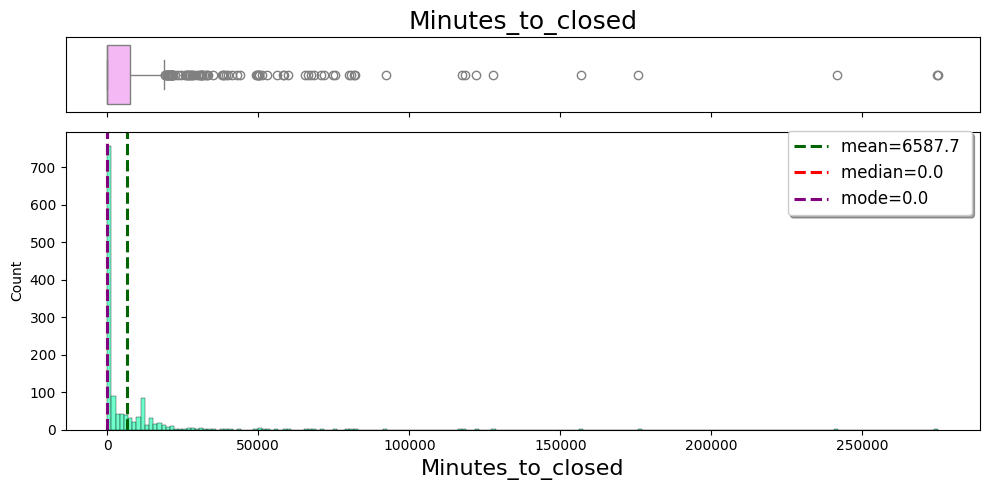

In [91]:
num_plot(merged_data, 'Minutes_to_closed', 'Minutes_to_closed', ' ')

Text(0.5, 1.05, "Numerical features correlation (Pearson's)")

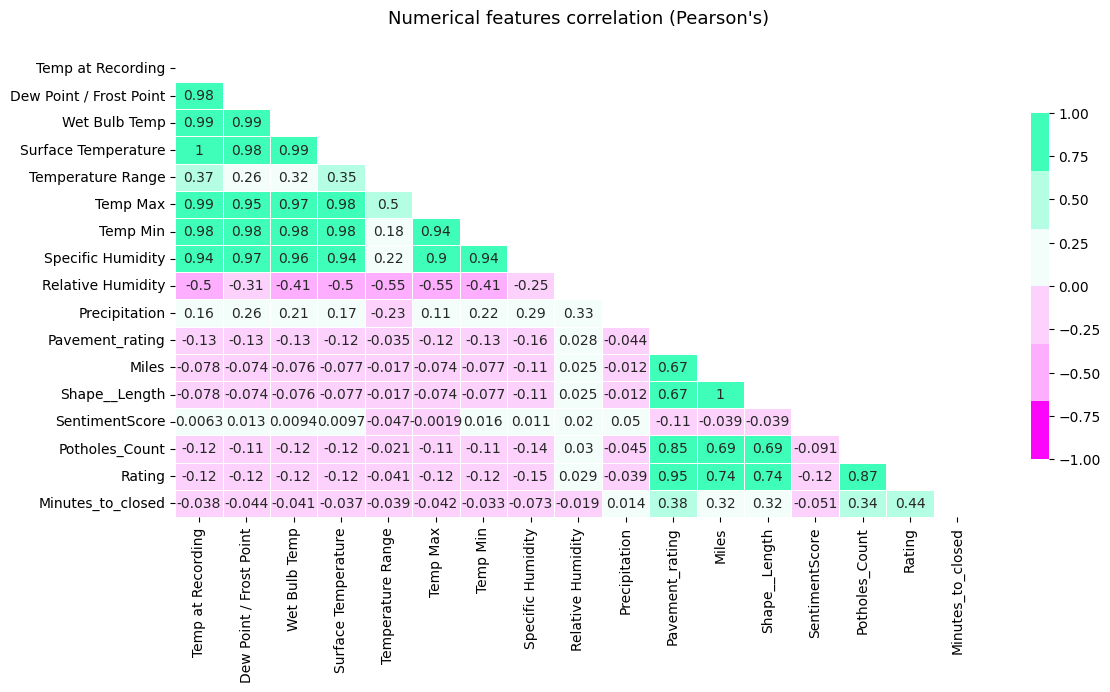

In [92]:
df_ = merged_data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(13, 6), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=13, y= 1.05)

In [93]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


cramers_v_matrix = pd.DataFrame(np.zeros((len(cat_feats), len(cat_feats))), index=cat_feats, columns=cat_feats)

for col1 in cat_feats:
    for col2 in cat_feats:
        cramers_v_matrix.loc[col1, col2] = cramers_v(merged_data[col1], merged_data[col2])

# Show the Cramér's V matrix
print(cramers_v_matrix)

                SeverityLevel  Matched_Street
SeverityLevel        1.000000        0.588144
Matched_Street       0.588144        1.000000
